<font size=8>Data Wrangle Project</font>

# Gathering all the required Data

### Import all important libraries

In [1]:
import os
import pandas as pd
import numpy as np
import requests
import re
import matplotlib.pyplot as plt

### Load twitter-archive-enhanced.csv file

In [2]:
df_twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')

### Download image-predictions.tsv file

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)
    

### Load image-predictions.tsv file

In [4]:
df_image_pred = pd.read_csv('image-predictions.tsv', sep = '\t')

### Use API to get Data From twitter

In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = '******************'
consumer_secret = '******************'
access_token = '******************'
access_secret = '******************'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token , access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_twitter_arch.tweet_id.values
print(len(tweet_ids))


2356


In [6]:

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print('Success')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [6]:
#load the created txt file into a dataframe
df = []
with open('tweet_json.txt') as file:
    for line in file:
        tweet = (json.loads(line))
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        create_date = tweet['created_at']
        df.append({'retweet_count' : retweet_count,
                  'favorite_count' : favorite_count,
                  'create_date' : create_date,
                  'tweet_id' : tweet_id})
        
df_extra_data = pd.DataFrame(df, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'create_date'])

### First Assess the Data Visually to get sense of it

#### twitter-archive-enhanced.csv

In [7]:
df_twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
df_twitter_arch.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [9]:
df_twitter_arch.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1126,729854734790754305,NaN,NaN,2016-05-10 02:05:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Ollie. He conducts this train. He...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/729854734...,11,10,Ollie,None,None,None,None
1639,684177701129875456,NaN,NaN,2016-01-05 01:00:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kulet. She's very proud of the flower ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684177701...,10,10,Kulet,None,None,None,None
1369,702332542343577600,NaN,NaN,2016-02-24 03:21:41 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Rudy. He's going to be a star. 13/10 t...,NaN,NaN,NaN,https://vine.co/v/irlDujgwOjd,13,10,Rudy,None,None,None,None
1848,675798442703122432,NaN,NaN,2015-12-12 22:04:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bernie. He just touched a boob for the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675798442...,10,10,Bernie,None,None,None,None
2064,671154572044468225,NaN,NaN,2015-11-30 02:31:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Holly. She's trying to teach small human-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671154572...,11,10,Holly,None,None,None,None


###  df_twitter_arch columns:
- <b>tweet_id</b>: unique identifier for each tweet.
- <b>in_reply_to_status_id</b>: if the tweet is a reply, it will contain the original tweet’s id.
- <b>in_reply_to_user_id</b>: if the tweet is a reply, it will contain the original tweet’s user id.
- <b>timestamp</b>: time when this tweet was created.
- <b>source</b>: utility used to post the tweet: Android app, iPhone app, or Web Client.
- <b>text</b>: actual UTF-8 text of the status update.
- <b>retweeted_status_id</b>: if the tweet is a retweet, it will contain the original tweet’s id.
- <b>retweeted_status_user_id</b>: if the tweet is a retweet, it will contain the original tweet’s user id.
- <b>retweeted_status_timestamp</b>: time of retweet.
- <b>expanded_urls</b>: tweet url.
- <b>rating_numerator</b>: numerator of the rating of a dog (ratings should have a numerator greater than 10).
- <b>rating_denominator</b>: denominator of the rating of a dog (ratings should have a denominator of 10).
- <b>name</b>: dog's name.
- <b>doggo</b>: one of the dog stages.
- <b>floofer</b>: one of the dog stages.
- <b>pupper</b>: one of the dog stages.
- <b>puppo</b>: one of the dog stages.

#### image-predictions.tsv

In [10]:
df_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
df_image_pred.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [12]:
df_image_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
72,667211855547486208,https://pbs.twimg.com/media/CUJppKJWoAA75NP.jpg,1,golden_retriever,0.462556,True,Labrador_retriever,0.454937,True,kuvasz,0.024193,True
1158,733822306246479872,https://pbs.twimg.com/media/Ci8Pfg_UUAA2m9i.jpg,1,Lhasa,0.457356,True,Shih-Tzu,0.371282,True,Tibetan_terrier,0.048359,True
352,672538107540070400,https://pbs.twimg.com/media/CVVV1wJWoAEcOyk.jpg,1,Siamese_cat,0.383937,False,Chihuahua,0.160274,True,giant_panda,0.147745,False
1744,822872901745569793,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True
872,697990423684476929,https://pbs.twimg.com/media/Ca_ClYOW0AAsvpE.jpg,2,Pembroke,0.984783,True,Cardigan,0.015018,True,Shetland_sheepdog,0.000074,True


### df_image_pred columns:

- <b>tweet_id</b>: the unique identifier for each tweet
- <b>jpg_url</b>: dog's image URL
- <b>img_num</b>: the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)
- <b>p1</b>: algorithm's #1 prediction for the image in the tweet
- <b>p1_conf</b>: how confident the algorithm is in its #1 prediction
- <b>p1_dog</b>: whether or not the #1 prediction is a breed of dog
- <b>p2</b>: algorithm's #2 prediction for the image in the tweet
- <b>p2_conf</b>: how confident the algorithm is in its #2 prediction
- <b>p2_dog</b>: whether or not the #2 prediction is a breed of dog
- <b>p3</b>: algorithm's #3 prediction for the image in the tweet
- <b>p3_conf</b>: how confident the algorithm is in its #3 prediction
- <b>p3_dog</b>: whether or not the #3 prediction is a breed of dog

#### tweet_json.txt

In [13]:
df_extra_data.head()

,tweet_id,retweet_count,favorite_count,create_date
0,892420643555336193,7485,35459,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,5557,30696,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,3680,23087,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,7664,38744,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,8266,37024,Sat Jul 29 16:00:24 +0000 2017


In [14]:
df_extra_data.tail()

,tweet_id,retweet_count,favorite_count,create_date
2323,666049248165822465,40,96,Mon Nov 16 00:24:50 +0000 2015
2324,666044226329800704,125,264,Mon Nov 16 00:04:52 +0000 2015
2325,666033412701032449,39,109,Sun Nov 15 23:21:54 +0000 2015
2326,666029285002620928,41,119,Sun Nov 15 23:05:30 +0000 2015
2327,666020888022790149,453,2358,Sun Nov 15 22:32:08 +0000 2015


In [15]:
df_extra_data.sample(5)

,tweet_id,retweet_count,favorite_count,create_date
506,809448704142938112,1465,6929,Thu Dec 15 17:23:04 +0000 2016
414,821044531881721856,2250,12584,Mon Jan 16 17:20:45 +0000 2017
1602,684567543613382656,1175,2929,Wed Jan 06 02:49:55 +0000 2016
949,750056684286914561,879,3107,Mon Jul 04 20:00:23 +0000 2016
857,760641137271070720,1276,4917,Wed Aug 03 00:59:13 +0000 2016


### df_extra_data columns:
- <b>tweet_id</b>: the unique identifier for each tweet
- <b>retweet_count</b>: number of how many times this tweet has been retweeted
- <b>favorite_count</b>: number of how many times this tweet has been liked
- <b>create_date</b>: time when this tweet has been created 

### Second Assessing Data Programmatically

#### twitter-archive-enhanced.csv

In [16]:
df_twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
# the rating denominator should be 10 for all tweets, so check if it has different values.
df_twitter_arch['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [18]:
# the rating numerator should be greater than 10 for all tweets, check it for having incorrect values.
df_twitter_arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [19]:
# check dog stages columns
df_twitter_arch.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [20]:
# check dog stages columns
df_twitter_arch.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [21]:
# check dog stages columns
df_twitter_arch.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [22]:
# check dog stages columns
df_twitter_arch.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [23]:
# check dog's name column for integrity
df_twitter_arch.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Bowie        1
Bruno        1
Harnold      1
Noosh        1
Joey         1
Name: name, Length: 957, dtype: int64

In [24]:
# count the retweets
df_twitter_arch[df_twitter_arch.retweeted_status_id.notnull()].tweet_id.count()

181

In [25]:
# count the reply tweets
df_twitter_arch[df_twitter_arch.in_reply_to_status_id.notnull()].tweet_id.count()

78

#### image-predictions.tsv

In [26]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
# check if the predections results have values more than 1
df_image_pred.p1_conf.max()

1.0

In [28]:
df_image_pred.p2_conf.max()

0.4880140000000001

In [29]:
df_image_pred.p3_conf.max()

0.273419

#### twitter_json.txt

In [30]:
df_extra_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2328 non-null   int64 
 1   retweet_count   2328 non-null   int64 
 2   favorite_count  2328 non-null   int64 
 3   create_date     2328 non-null   object
dtypes: int64(3), object(1)
memory usage: 72.9+ KB


## Assessing Report

### Quality Issues:

#### - twitter-archive-enhanced.csv
- some tweets are retweets (Solved)
- some tweets are reply (Solved)
- some tweets missing in image_predictions.tsv (Solved)
- source column has HTML Tags. (Solved)
- timestamp column in wrong datatype, it should be datetime. (Solved)
- tweet_id column in 3 dataframes is in wrong datatype, it should be string. (Solved)
- rating_denominator has different values other than 10. (Solved)
- rating_numerator has values less than 6.(my rule here that it is okay if the rating less than 10, that may point to dislike to that dog but less than 6 may be due to different reasons) (Not Solved)
- some of dogs' names are wrong (some are not even a name and some are in lowercase) (Solved)
#### - image-predictions.tsv
- columns p1, p1_conf, p1_dog, p2, p2_conf, p2_dog are not descriptive. (Solved)
#### - twitter_json.txt
- retweet_count and favorite_count are in wrong datatype (float), they should be int (Solved)

### Tidiness Issues:

#### - twitter-archive-enhanced.csv
- four columns for dog stage, it should be one column. (Solved)
#### - image-predictions.tsv
- three columns for prediction, three columns for confidence, three columns for the breed. (Solved)
- this dataset contains extra data related to Tweets, it should be merged with Archive dataset
#### - twitter_json.txt
- time column for the tweets repeated in twitter-archive-enhanced.tsv, also this data should be merged in same table represented in twitter-archive-enhanced.csv (Solved)

## Clean Data

### Copy the original data

In [73]:
#create copy from each dataframe
arch_clean = df_twitter_arch.copy()
img_clean = df_image_pred.copy()
more_data_clean = df_extra_data.copy()

### Clean Complete Issues first

### define
keep only the original tweets not retweets or replies

### code

In [74]:
# remove retweets from both archive df and image df
arch_clean.drop(arch_clean[arch_clean.retweeted_status_id.notnull()].index , inplace = True)
img_clean.drop(img_clean[~img_clean.tweet_id.isin(arch_clean.tweet_id)].index , inplace = True)

### test

In [75]:
#check if the arch df has retweets
arch_clean[arch_clean.retweeted_status_id.notnull()].tweet_id.count()

0

In [76]:
#check number of records in image df
print("Number of records in image Dataframe before cleaning: ", df_image_pred.tweet_id.count() , 
      "\nNumber of records in image Dataframe After cleaning: ", img_clean.tweet_id.count())

Number of records in image Dataframe before cleaning:  2075 
Number of records in image Dataframe After cleaning:  1994


### code

In [77]:
# remove replies from both archive df and image df
arch_clean.drop(arch_clean[arch_clean.in_reply_to_status_id.notnull()].index , inplace = True)
img_clean.drop(img_clean[~img_clean.tweet_id.isin(arch_clean.tweet_id)].index , inplace = True)

### test

In [78]:
#check if the arch df has replies
arch_clean[arch_clean.in_reply_to_status_id.notnull()].tweet_id.count()

0

In [79]:
#check number of records in image df
print("Number of records in image Dataframe before cleaning: ", df_image_pred.tweet_id.count() , 
      "\nNumber of records in image Dataframe After cleaning: ", img_clean.tweet_id.count())

Number of records in image Dataframe before cleaning:  2075 
Number of records in image Dataframe After cleaning:  1971


### define
keep the tweets that have images

### code

In [80]:
# remove records with tweet ids not exist in the image df
arch_clean.drop(arch_clean[~arch_clean.tweet_id.isin(img_clean.tweet_id)].index, inplace = True)

### test

In [81]:
#check if archive df has tweet ids not in image df
len(arch_clean[~arch_clean.tweet_id.isin(img_clean.tweet_id)])

0

### Clean Tidiness Issues second

### define
drop retweeted_status_id , retweeted_user_id , retweeted_timestamp , in_reply_to_status_id , in_reply_to_user_id columns. they are all not necessary now as we kept only the original tweets not the retweeted or reply ones

### code

In [82]:
arch_clean.drop(['retweeted_status_id' , 'retweeted_status_user_id'
                       , 'retweeted_status_timestamp' , 'in_reply_to_status_id' , 'in_reply_to_user_id']
                      , axis = 1 , inplace = True)

### test

In [83]:
#check the columns of the clean df
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   int64 
 1   timestamp           1971 non-null   object
 2   source              1971 non-null   object
 3   text                1971 non-null   object
 4   expanded_urls       1971 non-null   object
 5   rating_numerator    1971 non-null   int64 
 6   rating_denominator  1971 non-null   int64 
 7   name                1971 non-null   object
 8   doggo               1971 non-null   object
 9   floofer             1971 non-null   object
 10  pupper              1971 non-null   object
 11  puppo               1971 non-null   object
dtypes: int64(3), object(9)
memory usage: 200.2+ KB


### define
merge columns doggo, floofer, pupper, puppo in one column "stage"

### code

In [84]:
#search if there are any rows with unrecognised stage
arch_clean.doggo.value_counts()

None     1898
doggo      73
Name: doggo, dtype: int64

In [85]:
arch_clean.floofer.value_counts()

None       1963
floofer       8
Name: floofer, dtype: int64

In [86]:
arch_clean.pupper.value_counts()

None      1762
pupper     209
Name: pupper, dtype: int64

In [87]:
arch_clean.puppo.value_counts()

None     1948
puppo      23
Name: puppo, dtype: int64

In [88]:
# replace the None value (unrecognised stage) in the columns with empty string
arch_clean.doggo = arch_clean.doggo.replace('None' , '')
arch_clean.floofer = arch_clean.floofer.replace('None' , '')
arch_clean.pupper = arch_clean.pupper.replace('None' , '')
arch_clean.puppo = arch_clean.puppo.replace('None' , '')

In [89]:
# test the replacement step
arch_clean.doggo.value_counts()

         1898
doggo      73
Name: doggo, dtype: int64

In [90]:
# merge the four columns in new column called stage
arch_clean['stage'] = arch_clean['doggo'] + arch_clean['floofer'] + arch_clean['pupper'] + arch_clean['puppo'] 

In [91]:
# drop 'doggo', 'floofer', 'pupper', 'puppo' columns
arch_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'],axis =1 , inplace =True)

### test

In [92]:
#check what are columns found in the clean df
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   int64 
 1   timestamp           1971 non-null   object
 2   source              1971 non-null   object
 3   text                1971 non-null   object
 4   expanded_urls       1971 non-null   object
 5   rating_numerator    1971 non-null   int64 
 6   rating_denominator  1971 non-null   int64 
 7   name                1971 non-null   object
 8   stage               1971 non-null   object
dtypes: int64(3), object(6)
memory usage: 154.0+ KB


In [93]:
#check values in stage column
arch_clean.stage.value_counts()

                1668
pupper           201
doggo             63
puppo             22
doggopupper        8
floofer            7
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

### code

In [94]:
#separate the stages for entries with 2 stages
for i , row in arch_clean.iterrows():
    if row.stage == 'doggopupper':
        arch_clean.loc[i, 'stage'] = arch_clean.loc[i, 'stage'].replace('doggopupper' , 'doggo-pupper')
    elif row.stage == 'doggopuppo':
        arch_clean.loc[i, 'stage'] = arch_clean.loc[i, 'stage'].replace('doggopuppo' , 'doggo-puppo')
    elif row.stage == 'doggofloofer':
        arch_clean.loc[i, 'stage'] = arch_clean.loc[i, 'stage'].replace('doggofloofer' , 'doggo-floofer')

In [95]:
#check values in stage column
arch_clean.stage.value_counts()

                 1668
pupper            201
doggo              63
puppo              22
doggo-pupper        8
floofer             7
doggo-floofer       1
doggo-puppo         1
Name: stage, dtype: int64

In [96]:
# replace the empty strings in stage column with np.nan
arch_clean.iloc[: -1] = arch_clean.iloc[: -1].replace('', np.nan)

### test

In [97]:
#check values in stage column
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1971 non-null   int64 
 1   timestamp           1971 non-null   object
 2   source              1971 non-null   object
 3   text                1971 non-null   object
 4   expanded_urls       1971 non-null   object
 5   rating_numerator    1971 non-null   int64 
 6   rating_denominator  1971 non-null   int64 
 7   name                1971 non-null   object
 8   stage               304 non-null    object
dtypes: int64(3), object(6)
memory usage: 234.0+ KB


### define
rename columns to be more descriptive and merge columns to match tidiness criteria

### code

In [98]:
cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
img_clean.columns = cols

### test

In [99]:
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tweet_id      1971 non-null   int64  
 1   jpg_url       1971 non-null   object 
 2   img_num       1971 non-null   int64  
 3   prediction_1  1971 non-null   object 
 4   confidence_1  1971 non-null   float64
 5   breed_1       1971 non-null   bool   
 6   prediction_2  1971 non-null   object 
 7   confidence_2  1971 non-null   float64
 8   breed_2       1971 non-null   bool   
 9   prediction_3  1971 non-null   object 
 10  confidence_3  1971 non-null   float64
 11  breed_3       1971 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 159.8+ KB


### code

In [100]:
# Reshape image df
img_clean = pd.wide_to_long(img_clean, stubnames=['prediction', 'confidence', 'breed'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

#### Test

In [101]:
img_clean.tweet_id.value_counts()

781163403222056960    3
790698755171364864    3
670338931251150849    3
708109389455101952    3
791672322847637504    3
                     ..
738883359779196928    3
743510151680958465    3
668620235289837568    3
842765311967449089    3
728653952833728512    3
Name: tweet_id, Length: 1971, dtype: int64

### define
remove create_time column from df_more_data_clean and merge it to the archive dataframe

### code

In [102]:
more_data_clean.drop('create_date', axis = 1, inplace = True)

### test

In [103]:
more_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2328 non-null   int64
 1   retweet_count   2328 non-null   int64
 2   favorite_count  2328 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


### code

In [104]:
# merge the more data dataframe to the archive dataframe
arch_clean = arch_clean.merge(more_data_clean, how = 'left', on = 'tweet_id')

### test

In [105]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   stage               304 non-null    object 
 9   retweet_count       1961 non-null   float64
 10  favorite_count      1961 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 184.8+ KB


### define
Merge image dataset with Archive dataset and remove the duplicates (Keep only tweets with prediction algorithm level 1 as it is the one with the high confidence always)

### code

In [106]:
arch_clean = arch_clean.merge(img_clean, how = 'left', on = 'tweet_id')

In [107]:
arch_clean.drop_duplicates()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,7485.0,35459.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,1,orange,0.097049,False
1,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,7485.0,35459.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,2,bagel,0.085851,False
2,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,7485.0,35459.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,3,banana,0.076110,False
3,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5557.0,30696.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,1,Chihuahua,0.323581,True
4,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5557.0,30696.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,2,Pekinese,0.090647,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5908,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,41.0,119.0,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True
5909,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,41.0,119.0,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,3,Rhodesian_ridgeback,0.072010,True
5910,666020888022790149,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,,453.0,2358.0,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
5911,666020888022790149,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,,453.0,2358.0,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True


In [108]:
arch_clean = arch_clean[(arch_clean.prediction_level) == 1]

### test

In [109]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 5910
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   stage               304 non-null    object 
 9   retweet_count       1961 non-null   float64
 10  favorite_count      1961 non-null   float64
 11  jpg_url             1971 non-null   object 
 12  img_num             1971 non-null   int64  
 13  prediction_level    1971 non-null   int64  
 14  prediction          1971 non-null   object 
 15  confidence          1971 non-null   float64
 16  breed 

## Clean Quality Issues

### define
replace any HTML tags with ''

### code

In [110]:
arch_clean.source = arch_clean.source.str.replace(r'<(?:a\b[^>]*>|/a>)', '')

### test

In [111]:
arch_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,img_num,prediction_level,prediction,confidence,breed
4068,680609293079592961,2015-12-26 04:41:15 +0000,Twitter for iPhone,This is Brody. That is his chair. He loves his...,https://twitter.com/dog_rates/status/680609293...,9,10,Brody,NaN,672.0,2554.0,https://pbs.twimg.com/media/CXICiB9UwAE1sKY.jpg,1,1,French_bulldog,0.700764,True
87,886258384151887873,2017-07-15 16:17:19 +0000,Twitter for iPhone,This is Waffles. His doggles are pupside down....,https://twitter.com/dog_rates/status/886258384...,13,10,Waffles,NaN,5624.0,25740.0,https://pbs.twimg.com/media/DEyfTG4UMAE4aE9.jpg,1,1,pug,0.943575,True
4560,674767892831932416,2015-12-10 01:49:36 +0000,Twitter for iPhone,This pup was carefully tossed to make it look ...,https://twitter.com/dog_rates/status/674767892...,12,10,None,NaN,733.0,1721.0,https://pbs.twimg.com/media/CV1B0WkWwAEBKVx.jpg,1,1,shower_curtain,0.238855,False
3147,703611486317502464,2016-02-27 16:03:45 +0000,Twitter for iPhone,Meet Scooter. He's experiencing the pupper equ...,https://twitter.com/dog_rates/status/703611486...,10,10,Scooter,pupper,1486.0,3736.0,https://pbs.twimg.com/media/CcO66OjXEAASXmH.jpg,1,1,Pembroke,0.756441,True
2727,718234618122661888,2016-04-08 00:30:51 +0000,Twitter for iPhone,This is Suki. She was born with a blurry tail ...,https://twitter.com/dog_rates/status/718234618...,11,10,Suki,NaN,957.0,3766.0,https://pbs.twimg.com/media/CfeukpmW4AEGjOE.jpg,1,1,malamute,0.370152,True


### define
change datatype for timestamp column to datetime

### code

In [112]:
arch_clean.timestamp = pd.to_datetime(arch_clean.timestamp)

### test

In [113]:
arch_clean.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
stage                              object
retweet_count                     float64
favorite_count                    float64
jpg_url                            object
img_num                             int64
prediction_level                    int64
prediction                         object
confidence                        float64
breed                                bool
dtype: object

### define
change tweet_id column datatype in archive dataframe and image prediction dataframe from int to string

### code

In [114]:
#change tweet_id column
arch_clean.tweet_id = arch_clean.tweet_id.astype(str)

### test

In [115]:
#check the datatpye of columns in archive df
arch_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
stage                              object
retweet_count                     float64
favorite_count                    float64
jpg_url                            object
img_num                             int64
prediction_level                    int64
prediction                         object
confidence                        float64
breed                                bool
dtype: object

### define
change the datatypes for the retweet_count and favorite_count columns from float to int in archive dataframe

### code

In [117]:
#start by changing NaNs into 0
arch_clean.retweet_count = arch_clean.retweet_count.fillna(0).astype(int)
arch_clean.favorite_count = arch_clean.favorite_count.fillna(0).astype(int)
#change the type to int
arch_clean.retweet_count = arch_clean.retweet_count.astype(int)
arch_clean.favorite_count = arch_clean.favorite_count.astype(int)

### test

In [118]:
#check datatypes of retweet and favorite count columns, and that they have non null values
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 5910
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   stage               304 non-null    object             
 9   retweet_count       1971 non-null   int32              
 10  favorite_count      1971 non-null   int32              
 11  jpg_url             1971 non-null   object             
 12  img_num             1971 non-null 

### define
fix name values

### code
investigate text for records with lowercase in the name

In [119]:
arch_clean.name.value_counts().sort_index(ascending=False)

very            4
unacceptable    1
this            1
the             7
such            1
               ..
Aiden           1
Adele           1
Acro            1
Ace             1
Abby            2
Name: name, Length: 935, dtype: int64

In [120]:
for i, row in arch_clean.iterrows():
    if row['name'].islower():
        print("The Name: " , row['name'] , "\nThe text: \n" , row['text'])


The Name:  such 
The text: 
 I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
The Name:  a 
The text: 
 Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af 
(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
The Name:  quite 
The text: 
 We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9
The Name:  quite 
The text: 
 Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x
The Name:  one 
The text: 
 Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK
The Name:  incredibly 
The text: 
 We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating...

The Name:  a 
The text: 
 This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo
The Name:  a 
The text: 
 This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj
The Name:  a 
The text: 
 This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN
The Name:  a 
The text: 
 This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX
The Name:  a 
The text: 
 This is a brave dog. Excellent free climber. Trying to get closer to God. Not very loyal though. Doesn't bark. 5/10 https://t.co/ODnILTr4QM
The Name:  a 
The text: 
 This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl
The Name:

- some of the records with lowercase name are wrong names and have the right one written in the text after name or named

### code

In [121]:
# search for the right name for each name written in lowercase or written as None, replace the value if found or make it Nan if not found
reg_pattern = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for i, row in arch_clean.iterrows():  
    try:
        if row['name'].islower():
            correct_name = re.findall(reg_pattern, row['text'])[0]
            arch_clean.loc[i,'name'] = correct_name
        elif row['name'] == "None":
            correct_name = re.findall(reg_pattern, row['text'])[0]
            arch_clean.loc[i,'name'] = correct_name
    except IndexError:
        arch_clean.loc[i,'name'] = np.nan

### test

In [122]:
arch_clean.name.value_counts()

Charlie    11
Lucy       10
Oliver     10
Cooper     10
Tucker      9
           ..
Traviss     1
Kaia        1
Lulu        1
Samsom      1
Jordy       1
Name: name, Length: 936, dtype: int64

### define
investigate the tweets with denominator different than 10

### code

In [123]:
for i, row in arch_clean.iterrows():  
    if row.rating_denominator > 10:
        print('Denominator is: ' + str(row.rating_denominator) + '\n' + row.text + '\n')

Denominator is: 70
The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd

Denominator is: 150
Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE

Denominator is: 11
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ

Denominator is: 170
Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv

Denominator is: 20
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a

Denominator is: 50
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq

Denominator is: 90
Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1

Denominator is: 80
Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12

Denominato

- some denominators are multiplication of 10 by Number of dogs in the image, and the numerator also is multiplication of Number of dogs in the image

In [124]:
# iterate through all records whose rating_denominator is > 10
for i, row in arch_clean[arch_clean.rating_denominator > 10].iterrows():
    denominator = row.rating_denominator
    if denominator%10 == 0:
        arch_clean.loc[i, 'rating_denominator'] = 10
        # assign divisor as the quotient
        dogs_no = denominator/10
        arch_clean.loc[i, 'rating_numerator'] = int(row.rating_numerator/dogs_no)

In [125]:
# test
arch_clean.rating_denominator.value_counts()

10    1967
11       2
7        1
2        1
Name: rating_denominator, dtype: int64

- now investigate records with denominator > 10 and not divisible by 10

In [126]:
for i, row in arch_clean.iterrows():  
    if row.rating_denominator > 10:
        print('Denominator is: ' + str(row.rating_denominator) + '\n' + row.text + '\n')

Denominator is: 11
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ

Denominator is: 11
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5



- from the text displayed I found that those 2 records extracted wrongly 

In [127]:
# regex to match fractions
reg_pattern = "\s*(\d+([.]\d+)?([/]\d+))"
# iterate through all remaining records whose rating_denominator is > 10
for i, row in arch_clean[arch_clean.rating_denominator > 10].iterrows():
    correct_rating = re.finditer(reg_pattern, row.text)
    #print(correct_rating)
    for rating in correct_rating:
        #print(rating.group(1))
        if rating.group(1).split('/')[1] == '10':
            arch_clean.loc[i, 'rating_denominator'] = 10
            arch_clean.loc[i, 'rating_numerator'] = int(round(float(rating.group(1).split('/')[0])))

### test

In [128]:
arch_clean.rating_denominator.value_counts()

10    1969
7        1
2        1
Name: rating_denominator, dtype: int64

#### now investigate records with denominator < 10 

In [129]:
for i, row in arch_clean.iterrows():  
    if row.rating_denominator < 10:
        print('Denominator is: ' + str(row.rating_denominator) + '\n' + row.text + '\n')

Denominator is: 7
Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx

Denominator is: 2
This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv



In [130]:
reg_pattern = "\s*(\d+([.]\d+)?([/]\d+))"
# iterate through records whose rating_denominator is < 10
for i, row in arch_clean[arch_clean.rating_denominator < 10].iterrows():
    correct_rating = re.finditer(reg_pattern, row.text)
    for rating in correct_rating:
        if rating.group(1).split('/')[1] == '10':
            arch_clean.loc[i, 'rating_denominator'] = 10
            arch_clean.loc[i, 'rating_numerator'] = int(round(float(rating.group(1).split('/')[0])))

### test

In [131]:
arch_clean.rating_denominator.value_counts()

10    1970
7        1
Name: rating_denominator, dtype: int64

### define
drop the record with denominator 7 as there is no rating for this tweet appears in the text

### code

In [132]:
arch_clean.drop(arch_clean[arch_clean.rating_denominator == 7].index, inplace = True)

### test

In [135]:
arch_clean.rating_denominator.value_counts()

10    1970
Name: rating_denominator, dtype: int64

### define
investigate records with numerator less than 6

### code

In [139]:
for i, row in arch_clean.iterrows():  
    if row.rating_numerator < 6:
        print('Numerator is: ' + str(row.rating_numerator) + '\n' + row.text + '\n')

Numerator is: 5
This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948

Numerator is: 0
When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag

Numerator is: 5
Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC

Numerator is: 3
This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M

Numerator is: 4
This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP

Numerator is: 4
Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl

Numerator is: 5
Please stop sending it pictures that don't even have a doggo or pupper in them. Churl

#### after investigating I found some of the low ratings were for animals other than dogs

## Storing Data

#### I will save the two dataframes into two different csv files for analysis later

In [140]:
#save archive df to twitter_archive_master.csv
arch_clean.to_csv('twitter_archive_master.csv', index = False)

### Read the new files

In [141]:
df_arch = pd.read_csv('twitter_archive_master.csv')

In [142]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1970 entries, 0 to 1969
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1970 non-null   int64  
 1   timestamp           1970 non-null   object 
 2   source              1970 non-null   object 
 3   text                1970 non-null   object 
 4   expanded_urls       1970 non-null   object 
 5   rating_numerator    1970 non-null   int64  
 6   rating_denominator  1970 non-null   int64  
 7   name                1378 non-null   object 
 8   stage               303 non-null    object 
 9   retweet_count       1970 non-null   int64  
 10  favorite_count      1970 non-null   int64  
 11  jpg_url             1970 non-null   object 
 12  img_num             1970 non-null   int64  
 13  prediction_level    1970 non-null   int64  
 14  prediction          1970 non-null   object 
 15  confidence          1970 non-null   float64
 16  breed 

#### I need to convert the timestamp column again to datetime datatype and tweet_id to string

In [143]:
df_arch.tweet_id = df_arch.tweet_id.astype(str)

In [144]:
df_arch.timestamp = pd.to_datetime(df_arch.timestamp)

In [145]:
#check timestamp and tweet_id datatype
df_arch.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
stage                              object
retweet_count                       int64
favorite_count                      int64
jpg_url                            object
img_num                             int64
prediction_level                    int64
prediction                         object
confidence                        float64
breed                                bool
dtype: object

In [146]:
df_arch.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,7485,35459,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,1,orange,0.097049,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,5557,30696,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,1,Chihuahua,0.323581,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,3680,23087,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,1,Chihuahua,0.716012,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,7664,38744,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,1,paper_towel,0.170278,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,8266,37024,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,1,basset,0.555712,True


# Analysis Process

#### Now after cleaning the Data I can apply some analysis on it to answer the following questions
- What dog stage receives more likes and retweets?
- What dog stage receives the best ratings?
- What is the most twitter source used?
- Analyzing number of tweets posted over time.
- What is the average retweet count for each Dog stage?
- What are the Top 10 Dog breeds rated?

### Analyzing number of tweets posted over time

In [149]:
# count the tweets in each month
df_arch.groupby(df_arch['timestamp'].dt.strftime('%Y-%m')).timestamp.count().sort_index()

timestamp
2015-11    295
2015-12    360
2016-01    166
2016-02    108
2016-03    118
2016-04     54
2016-05     56
2016-06     79
2016-07     88
2016-08     59
2016-09     63
2016-10     65
2016-11     52
2016-12     53
2017-01     66
2017-02     64
2017-03     47
2017-04     40
2017-05     42
2017-06     44
2017-07     49
2017-08      2
Name: timestamp, dtype: int64

#### As you can see the tweets decreased dramatically after March 2016

### The most twitter source used

In [150]:
# count each value in source column
df_arch.source.value_counts().sort_index()

TweetDeck               11
Twitter Web Client      28
Twitter for iPhone    1931
Name: source, dtype: int64

#### I can see that the most twitter source used was iPhone twitter app 

### Average retweet count for each Dog stage

In [151]:
print('Doggo Stage:')
print('Average Retweet Count\t', 
                  round(df_arch.retweet_count[df_arch.stage == 'doggo'].mean()),'\n')
print('Floofer Stage:')
print('Average Retweet Count\t', 
                  round(df_arch.retweet_count[df_arch.stage == 'floofer'].mean()),'\n')
print('Pupper Stage:')
print('Average Retweet Count\t', 
                  round(df_arch.retweet_count[df_arch.stage == 'pupper'].mean()),'\n')
print('Puppo Stage:')
print('Average Retweet Count\t', 
                  round(df_arch.retweet_count[df_arch.stage == 'puppo'].mean()),'\n')

Doggo Stage:
Average Retweet Count	 6263 

Floofer Stage:
Average Retweet Count	 4237 

Pupper Stage:
Average Retweet Count	 2054 

Puppo Stage:
Average Retweet Count	 5673 



#### I see here that doggo stage is the most popular stage retweeted

## Visualizing Analysis

### Ploting Tweeting trend

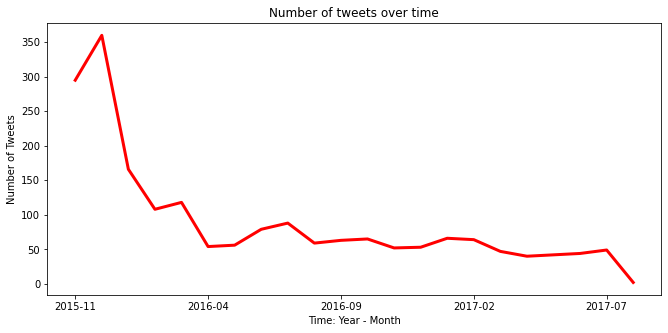

In [152]:
fig_data = df_arch.tweet_id.groupby(df_arch['timestamp'].dt.strftime('%Y-%m')).count()
fig = fig_data.plot(kind = 'line', figsize = (11,5) , title = 'Number of tweets over time', color = 'red' , linewidth = 3)
fig.set_xlabel("Time: Year - Month")
fig.set_ylabel("Number of Tweets")
plt.savefig('tweeting_trend')

### Ploting Most rated stage

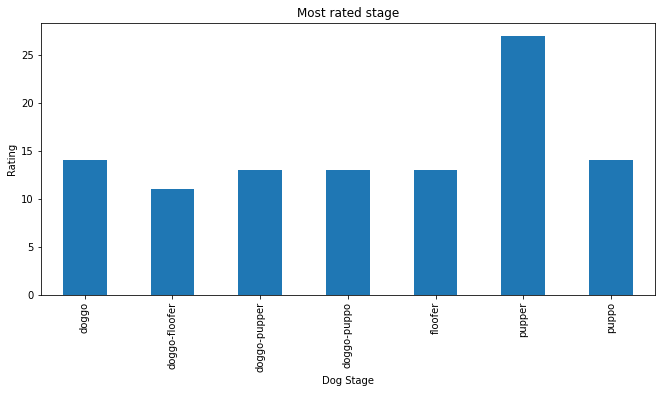

In [153]:
fig = df_arch.rating_numerator.groupby(df_arch.stage).max().plot(kind='bar', figsize=(11,5), title='Most rated stage')
fig.set_xlabel("Dog Stage")
fig.set_ylabel("Rating")
plt.savefig('dog_rating')

### Ploting Most favorite stage

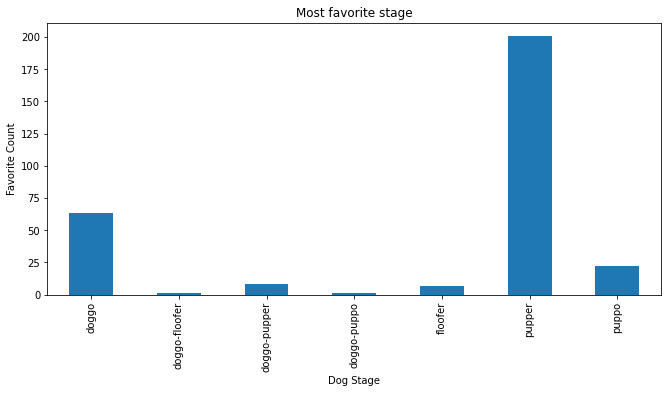

In [154]:
fig = df_arch.favorite_count.groupby(df_arch.stage).count().plot(kind='bar', figsize=(11,5), title='Most favorite stage')
fig.set_xlabel("Dog Stage")
fig.set_ylabel("Favorite Count")
plt.savefig('fav_dog')

## Ploting Top 10 Dog Breeds

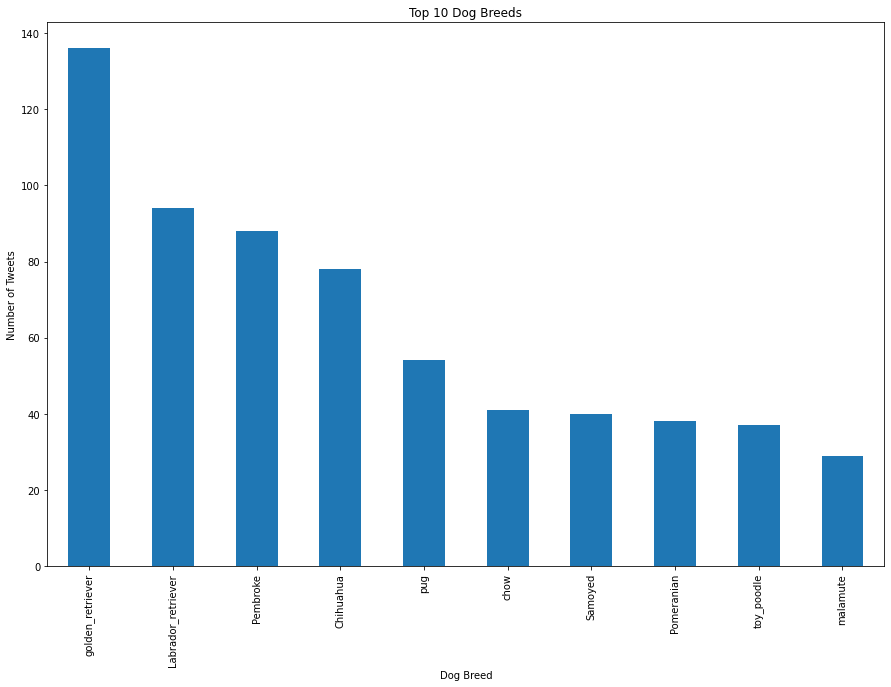

In [156]:
fig = df_arch.prediction.value_counts().sort_values(ascending = False).head(10).plot(kind = 'bar' , figsize = (15,10) , title = 'Top 10 Dog Breeds')
fig.set_xlabel("Dog Breed")
fig.set_ylabel("Number of Tweets")
plt.savefig('dog_breed')

#### Picture with most rating

In [158]:
df_arch[df_arch.rating_numerator == df_arch.rating_numerator.max()].jpg_url

721    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: jpg_url, dtype: object